(graphene-nb)=
# Graphene band structure

This is a toy model of a two-dimensional graphene sheet.

In [1]:
from pythtb import TBModel 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define lattice vectors
lat = [[1.0, 0.0], [0.5, np.sqrt(3.0) / 2.0]]
# define coordinates of orbitals
orb = [[1.0 / 3.0, 1.0 / 3.0], [2.0 / 3.0, 2.0 / 3.0]]

# make two dimensional tight-binding graphene model
my_model = TBModel(2, 2, lat, orb)

# set model parameters
delta = 0.0
t = -1.0

# set on-site energies
my_model.set_onsite([-delta, delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [0, 0])
my_model.set_hop(t, 1, 0, [1, 0])
my_model.set_hop(t, 1, 0, [0, 1])

print(my_model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000 ,    0   ]
  # 1 ===> [ 0.500 ,  0.866 ]
Orbital vectors (dimensionless):
  # 0 ===> [ 0.333 ,  0.333 ]
  # 1 ===> [ 0.667 ,  0.667 ]
Site energies:
  # 0 ===> -0.000 
  # 1 ===>  0.000 
Hoppings:
  < 0 | H | 1 + [ 0.0 ,  0.0 ] >  ===> -1.0000
  < 1 | H | 0 + [ 1.0 ,  0.0 ] >  ===> -1.0000
  < 1 | H | 0 + [ 0.0 ,  1.0 ] >  ===> -1.0000
Hopping distances:
  | pos(0) - pos(1 + [ 0.0 ,  0.0 ]) | =  0.577 
  | pos(1) - pos(0 + [ 1.0 ,  0.0 ]) | =  0.577 
  | pos(1) - pos(0 + [ 0.0 ,  1.0 ]) | =  0.577 


## Generating k-points from `TBModel`

Generate list of k-points following a segmented path in the BZ list of nodes (high-symmetry points) using `TBModel.k_path`.

Outputs:
- k_vec: list of interpolated k-points
- k_dist: horizontal axis position of each k-point in the list
- k_node: horizontal axis position of each original node

In [3]:
path = [[0, 0], [2/3, 1/3], [1/2, 1.2], [0, 0]]
label = (r"$\Gamma $", r"$K$", r"$M$", r"$\Gamma $")
nk = 121

k_vec, k_dist, k_node = my_model.k_path(path, nk)

----- k_path report -----
Real-space lattice vectors:
 [[1.      0.     ]
 [0.5     0.86603]]
K-space metric tensor:
 [[ 1.33333 -0.66667]
 [-0.66667  1.33333]]
Nodes (reduced coords):
 [[0.      0.     ]
 [0.66667 0.33333]
 [0.5     1.2    ]
 [0.      0.     ]]
Reciprocal-space vectors:
 [[ 1.      -0.57735]
 [ 0.       1.1547 ]]
Nodes (Cartesian coords):
 [[0.00000e+00 0.00000e+00]
 [6.66667e-01 1.56412e-17]
 [5.00000e-01 1.09697e+00]
 [0.00000e+00 0.00000e+00]]
Segments:
  Node 0 [0. 0.] to Node 1 [0.66667 0.33333]: distance = 0.66667
  Node 1 [0.66667 0.33333] to Node 2 [0.5 1.2]: distance = 1.10955
  Node 2 [0.5 1.2] to Node 3 [0. 0.]: distance = 1.20554
Node distances (cumulative): [0.      0.66667 1.77622 2.98176]
Node indices in path: [  0  27  71 120]
-------------------------


## Band structure

We compute the band structure by solving the Hamiltonian at each k-point along the specified path.

In [4]:
evals = my_model.solve_ham(k_vec)

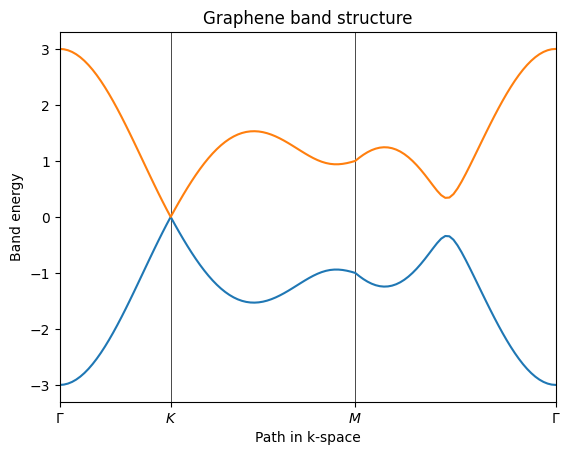

In [5]:
fig, ax = plt.subplots()

ax.set_xlim(k_node[0], k_node[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(label)

for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5, color="k")
    
ax.set_title("Graphene band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")

# plot bands
ax.plot(k_dist, evals)